In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

!pip install ultralytics --quiet

from ultralytics import YOLO

data_yaml = "/content/drive/MyDrive/shoreline_project/shoreline_pose_dataset/data.yaml"

# Check if the data.yaml file exists
if not os.path.exists(data_yaml):
    print(f"Error: The file {data_yaml} does not exist. Please check the path and ensure Google Drive is mounted correctly.")
else:
    model = YOLO("yolov8n-pose.pt")   # start with nano (fast + good for testing)

    model.train(
        data=data_yaml,
        epochs=80,
        imgsz=640,
        batch=16,     # if you get GPU memory error → change to 8 or 4
        name="shoreline_runup_pose_v1"
    )


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/shoreline_project/shoreline_pose_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=shoreline_runup_pose_v12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto,

In [ ]:
!cp /content/runs/pose/shoreline_runup_pose_v12/weights/best.pt \
    /content/drive/MyDrive/shoreline_project/shoreline_runup_pose_best.pt

print("✅ Best model saved to Drive")



✅ Best model saved to Drive


In [ ]:
!ls /content/drive/MyDrive/shoreline_project | grep shoreline_runup_pose


shoreline_runup_pose_best.pt


In [ ]:
!ls /content/runs/pose


shoreline_runup_pose_v1  shoreline_runup_pose_v12


In [ ]:
run_dir = "/content/runs/pose/shoreline_runup_pose_v12"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = run_dir + "/results.csv"
df = pd.read_csv(csv_path)

print(df.columns)   # IMPORTANT: see available metrics
df.head()


Index(['epoch', 'time', 'train/box_loss', 'train/pose_loss', 'train/kobj_loss',
       'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)',
       'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)',
       'metrics/precision(P)', 'metrics/recall(P)', 'metrics/mAP50(P)',
       'metrics/mAP50-95(P)', 'val/box_loss', 'val/pose_loss', 'val/kobj_loss',
       'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


,epoch,time,train/box_loss,train/pose_loss,train/kobj_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),...,metrics/mAP50(P),metrics/mAP50-95(P),val/box_loss,val/pose_loss,val/kobj_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,124.548,2.72430,11.49010,0.63514,2.70634,1.68030,0.26903,0.24569,0.18679,...,0.00000,0.00000,3.13332,11.35410,0.30542,2.31131,1.10874,0.000664,0.000664,0.000664
1,2,243.281,2.18280,10.99280,0.53941,2.08710,1.25681,0.15817,0.20366,0.10606,...,0.00003,0.00000,3.29108,10.34310,0.24118,3.04987,0.92893,0.001314,0.001314,0.001314
2,3,358.296,2.09757,10.49970,0.48082,2.09163,1.18719,0.27905,0.21444,0.14616,...,0.00013,0.00001,3.25549,10.51540,0.25460,3.08565,0.87261,0.001948,0.001948,0.001948
3,4,474.707,1.98487,10.01960,0.37227,2.00279,1.12622,0.09247,0.15409,0.07258,...,0.00028,0.00004,3.36200,9.71180,0.25122,3.10199,1.00272,0.001926,0.001926,0.001926
4,5,589.763,1.89134,9.49965,0.31397,1.93535,1.08296,0.37885,0.38793,0.28437,...,0.02314,0.00442,2.82713,8.55714,0.37739,2.11442,0.79830,0.001901,0.001901,0.001901


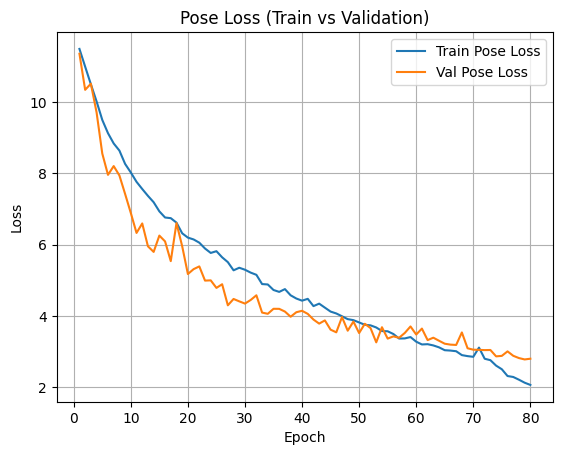

In [ ]:
plt.figure()
plt.plot(df["epoch"], df["train/pose_loss"], label="Train Pose Loss")
plt.plot(df["epoch"], df["val/pose_loss"], label="Val Pose Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Pose Loss (Train vs Validation)")
plt.legend()
plt.grid()
plt.show()


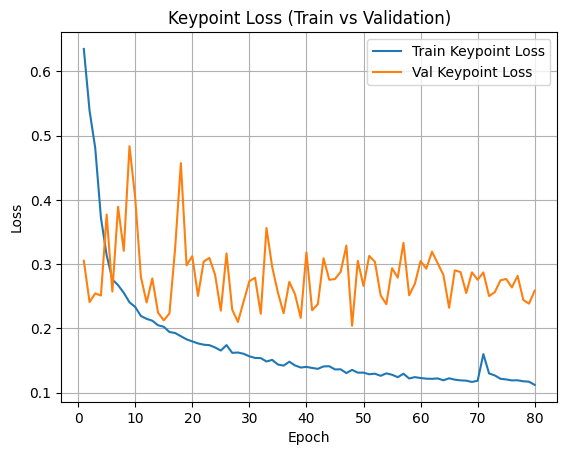

In [ ]:
plt.figure()
plt.plot(df["epoch"], df["train/kobj_loss"], label="Train Keypoint Loss")
plt.plot(df["epoch"], df["val/kobj_loss"], label="Val Keypoint Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Keypoint Loss (Train vs Validation)")
plt.legend()
plt.grid()
plt.show()

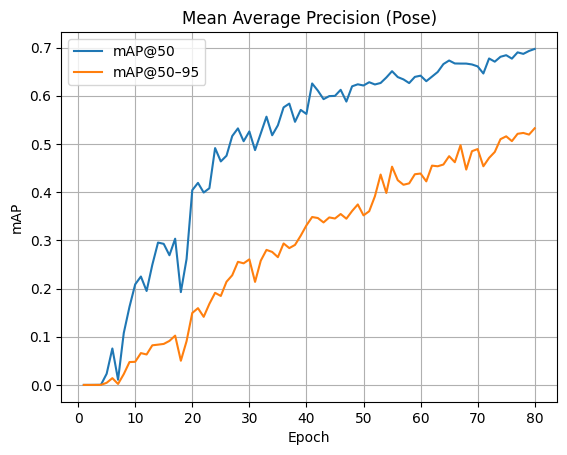

In [ ]:
plt.figure()
plt.plot(df["epoch"], df["metrics/mAP50(P)"], label="mAP@50")
plt.plot(df["epoch"], df["metrics/mAP50-95(P)"], label="mAP@50–95")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.title("Mean Average Precision (Pose)")
plt.legend()
plt.grid()
plt.show()


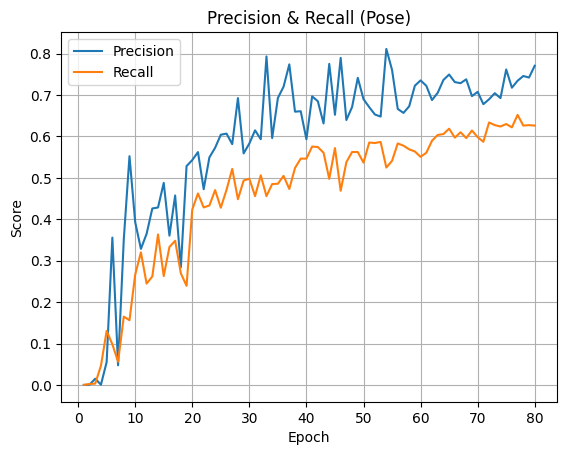

In [ ]:
plt.figure()
plt.plot(df["epoch"], df["metrics/precision(P)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(P)"], label="Recall")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision & Recall (Pose)")
plt.legend()
plt.grid()
plt.show()


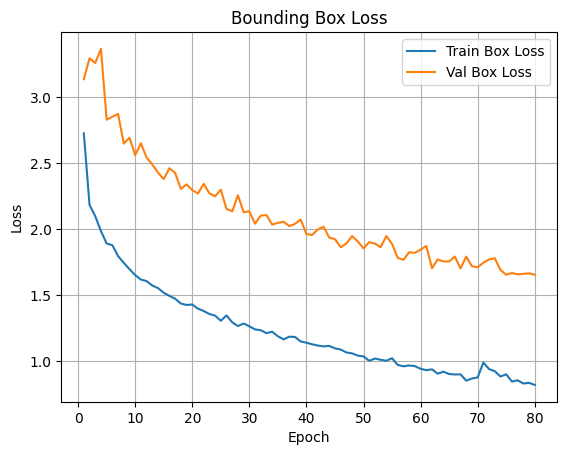

In [ ]:
plt.figure()
plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Bounding Box Loss")
plt.legend()
plt.grid()
plt.show()


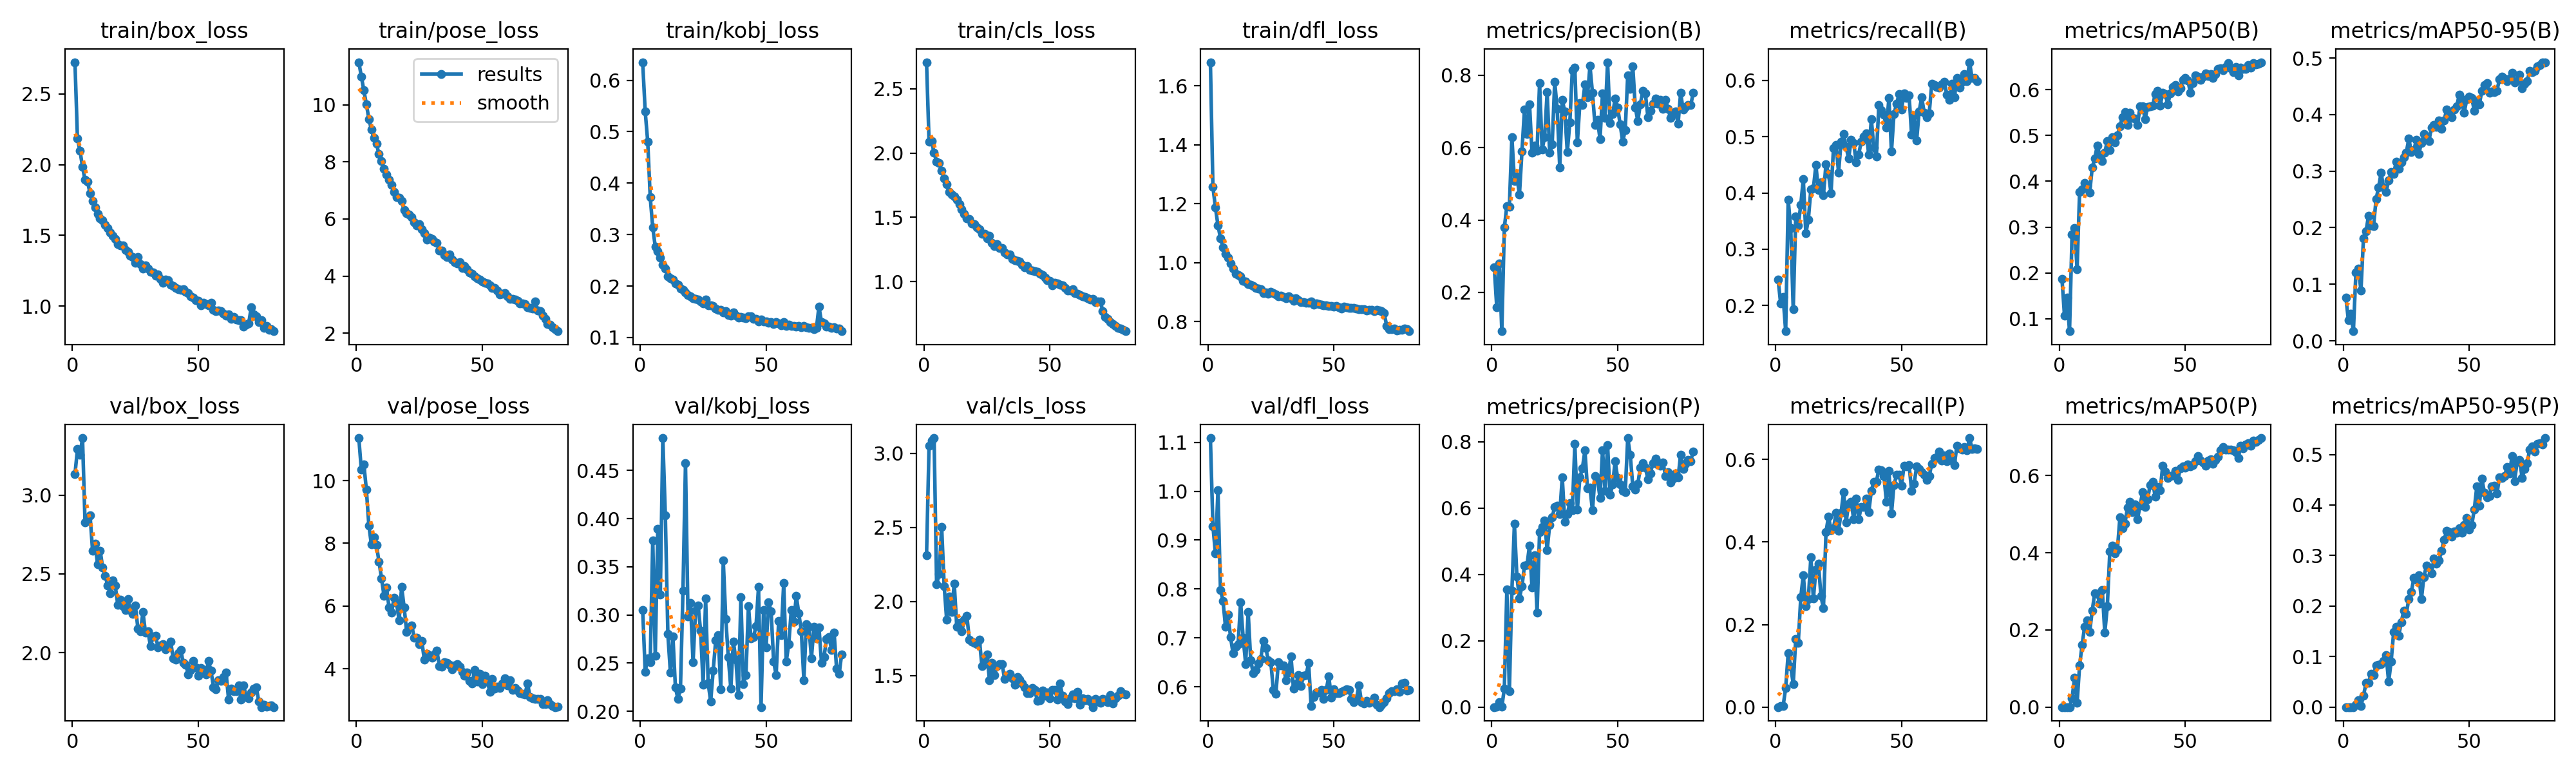

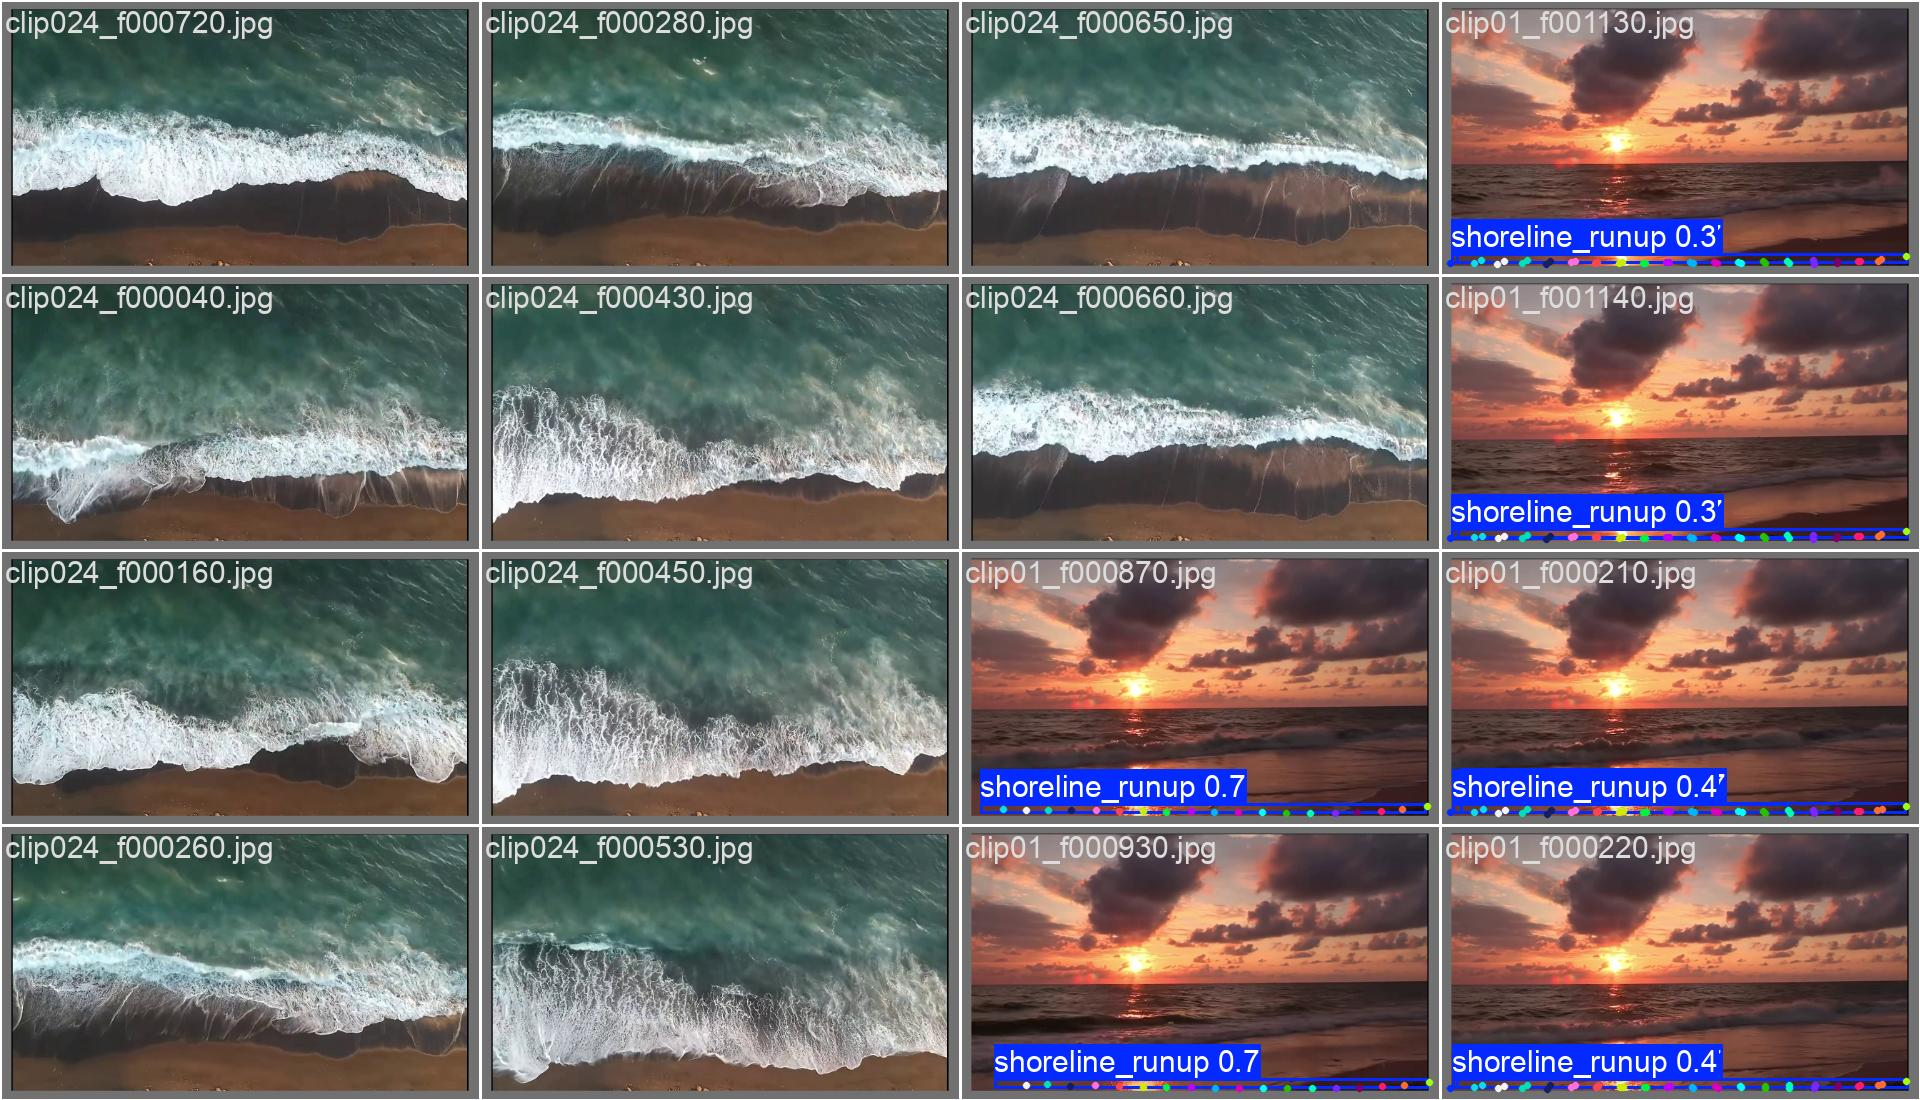

In [ ]:
from IPython.display import Image, display

display(Image(run_dir + "/results.png"))
display(Image(run_dir + "/val_batch0_pred.jpg"))